# Introduction

In recent times, Americans have experienced many hardships from Covid-19. In this study, we will be looking to see if there is any relationships between the weekly earnings of Americans and house prices durning Covid. We will be using a dataset from the Bureau of Labor Statistics(weekly earnings), and one from Federal Housing Finance Agency(housing price index).

# Data Prep

In [ ]:
!pip install ISLP
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import numpy as np
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor

earnings = pd.read_csv("/content/weekly_earnings_raw[1].csv")
price_index = pd.read_csv('/content/house_price_index_yoy_percent_change[1].csv')

print(earnings)
print(price_index)


FileNotFoundError: ignored

## Weekly Earings of Americans
We will be looking at the weekly earnings of all private-sector employees.

2018-01-01    1134.016333
2018-02-01    1138.007524
2018-03-01    1136.710507
2018-04-01    1161.115840
2018-05-01    1132.071597
                 ...     
2023-05-01    1154.647723
2023-06-01    1156.621004
2023-07-01    1182.309042
2023-08-01    1159.404129
2023-09-01    1160.030000
Name: 0, Length: 69, dtype: float64


Text(0.5, 0, 'Dates')

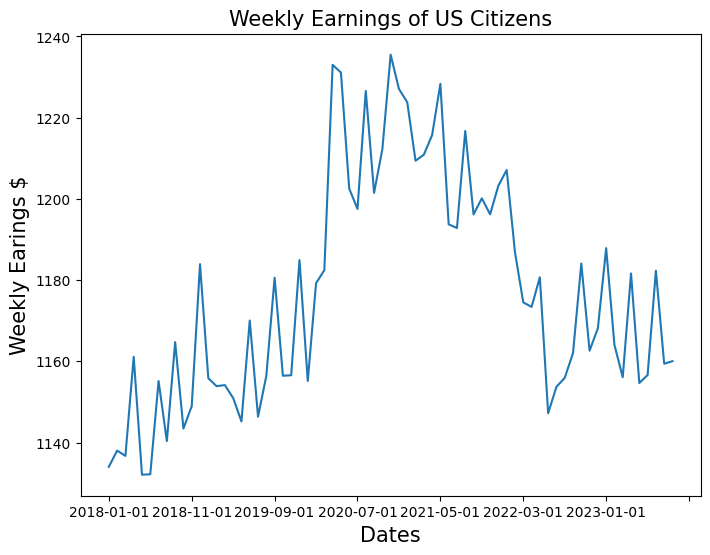

In [ ]:
data_earnings = earnings.iloc[:,133:]
data_earnings_US = data_earnings.iloc[0]

print(data_earnings_US)

data_earnings_US.plot(figsize= (8,6))
plt.title("Weekly Earnings of US Citizens",fontsize = 15)
plt.ylabel("Weekly Earings $", fontsize=15)
plt.xlabel("Dates", fontsize=15)

We've noticed there is a spike durning March/April 2020 in weekly earnings. We see a fall in earnings around August 2022. ....

## Housing Price Index
We will be using a broad measure of single-family house price changes in quaters from the Federal Housing Finance Agency.

Text(0.5, 0, 'Quaters')

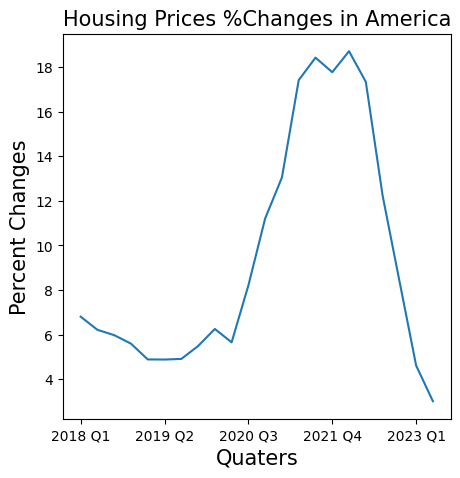

In [ ]:
data_price_index = price_index.iloc[:,105:]
data_price_index_US = data_price_index.iloc[0]

data_price_index_US.plot(figsize=(5,5))

plt.title("Housing Prices %Changes in America", fontsize=15)
plt.ylabel("Percent Changes", fontsize=15)
plt.xlabel("Quaters", fontsize=15)


Regression Analysis for GDP

In [ ]:
total_gdp = pd.read_csv("/content/state_gdp_raw_in_millions[1].csv")
total_gdp_US = total_gdp.iloc[0,53:]
print(total_gdp_US)

retail_gdp = pd.read_csv("/content/retail_trade_state_gdp_raw_in_millions[1].csv")
retail_gdp_US = retail_gdp.iloc[0,53:]
print(retail_gdp_US)

manu_gdp = pd.read_csv("/content/manufacturing_state_gdp_raw_in_millions[1].csv")
manu_gdp_US = manu_gdp.iloc[0,53:]
print(manu_gdp_US)

gov_gdp = pd.read_csv("/content/government_state_gdp_raw_in_millions[1].csv")
gov_gdp_US = gov_gdp.iloc[0,53:]
print(gov_gdp_US)

acco_food_gdp = pd.read_csv("/content/accommodation_and_food_services_state_gdp_raw_in_millions[1].csv")
acco_food_gdp_US = acco_food_gdp.iloc[0,53:]
print(acco_food_gdp_US)

2018 Q1    24115888.996907
2018 Q2    24284057.310932
2018 Q3    24459241.496466
2018 Q4     24503675.34935
2019 Q1    24636764.305836
2019 Q2    24802593.996025
2019 Q3    25023275.045278
2019 Q4    25134253.376404
2020 Q1      24838736.3644
2020 Q2     22731423.68599
2020 Q3    24516856.683698
2020 Q4    24753057.691135
2021 Q1    25134891.182905
2021 Q2    25563922.355729
2021 Q3    25731878.067588
2021 Q4    26168137.714087
2022 Q1    26060773.619797
2022 Q2    26023143.036254
2022 Q3    26231493.159826
2022 Q4    26398811.065184
2023 Q1         26529774.0
Name: 0, dtype: object


FileNotFoundError: ignored

Text(0.5, 0, 'Quaters')

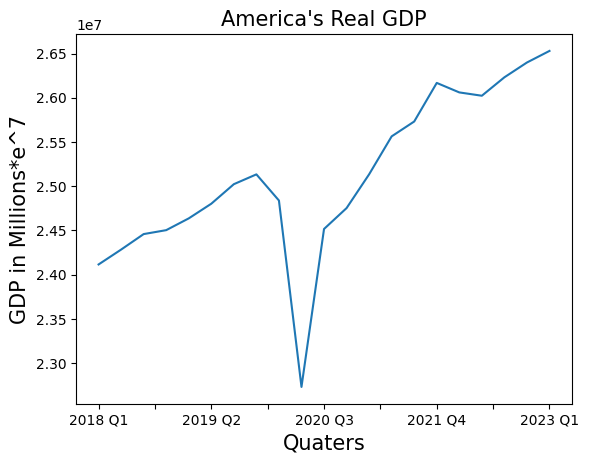

In [ ]:
total_gdp_US.plot()
plt.title("America's Real GDP", fontsize=15)
plt.ylabel("GDP in Millions*e^7", fontsize=15)
plt.xlabel("Quaters", fontsize=15)

In [ ]:
data = pd.DataFrame({'Total GDP':[24115888.996906705, 24284057.31093232, 24459241.496465947,
   24503675.349350087, 24636764.305835597, 24802593.9960252,
   25023275.045277517, 25134253.3764044, 24838736.36439985,
   22731423.685990416, 24516856.68369849, 24753057.691135224,
   25134891.182905134, 25563922.355729006, 25731878.06758771,
   26168137.714086518, 26060773.61979709, 26023143.036254067,
   26231493.15982562, 26398811.065183595, 26529774.0],
      'Retail GDP':[1498762.5545433932, 1491394.6824321044, 1516045.8342078414,
   1495865.3573742085, 1518855.6159451976, 1523026.580835317,
   1544755.5596042045 ,1543744.038178756, 1516407.9838539895,
   1380551.9148731155, 1530319.5254336102 ,1527235.0094819348,
   1587676.536632172, 1536438.6056616302, 1480380.3380216684,
   1505780.7649273672, 1446825.3001182205, 1451807.9797324652,
   1475947.1268360622 ,1505106.4173104018, 1542233.0],
      'Manufacturing GDP':[2800172.59870981, 2820656.06810002, 2836623.693446833 ,2866987.131020384,
   2836648.642861438, 2868434.1970674386, 2907255.4861918786,
   2895354.615425582 ,2829787.553845229, 2505994.051109374,
   2822277.7800493054 ,2826569.079361262, 2888393.728750956,
   2932703.8890883634 ,2899845.510054373 ,2997672.164718211,
   2974394.36089231, 2909301.33818944, 2912719.407990242 ,2944704.557513078,
   2904536.0],
      'Government GDP':[2968306.259937676, 2978871.4969597934, 2981906.81367333,
   2978462.8966329712 ,2959900.76750019, 2985204.802025538,
   2997462.8118302044 ,3035608.570912822, 3048187.6238314207,
   2932378.6169149503, 2976449.08073649, 2978929.8684350536,
   2970991.347799651, 2988911.390704568, 3021044.8878353727,
   3019498.0437409743, 3033069.4117389983, 3031259.8960059285,
   3036163.099927795 ,3051660.72660941, 3071974.0],
      'A&Food Services GDP':[816216.07639102, 827316.5633329739, 828178.1793957389 ,841023.4388647919,
   840147.4625343143, 845647.4450682966 ,857588.0076714464,
   843457.5042421026, 769028.2366869304, 456326.2271079891,
   668973.0713983595 ,660285.109432147, 691303.2876916826,
   816905.3692412318, 854471.8295777802 ,860014.8929149009,
   834424.8958507841, 850350.4327442215, 853394.8094993242,
   848239.4733904477, 865759.0]})

print(data)


       Total GDP    Retail GDP  Manufacturing GDP  Government GDP  \
0   2.411589e+07  1.498763e+06       2.800173e+06    2.968306e+06   
1   2.428406e+07  1.491395e+06       2.820656e+06    2.978871e+06   
2   2.445924e+07  1.516046e+06       2.836624e+06    2.981907e+06   
3   2.450368e+07  1.495865e+06       2.866987e+06    2.978463e+06   
4   2.463676e+07  1.518856e+06       2.836649e+06    2.959901e+06   
5   2.480259e+07  1.523027e+06       2.868434e+06    2.985205e+06   
6   2.502328e+07  1.544756e+06       2.907255e+06    2.997463e+06   
7   2.513425e+07  1.543744e+06       2.895355e+06    3.035609e+06   
8   2.483874e+07  1.516408e+06       2.829788e+06    3.048188e+06   
9   2.273142e+07  1.380552e+06       2.505994e+06    2.932379e+06   
10  2.451686e+07  1.530320e+06       2.822278e+06    2.976449e+06   
11  2.475306e+07  1.527235e+06       2.826569e+06    2.978930e+06   
12  2.513489e+07  1.587677e+06       2.888394e+06    2.970991e+06   
13  2.556392e+07  1.536439e+06    

                            OLS Regression Results                            
Dep. Variable:              Total GDP   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     40.22
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           3.71e-08
Time:                        21:23:58   Log-Likelihood:                -292.71
No. Observations:                  21   AIC:                             595.4
Df Residuals:                      16   BIC:                             600.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
A&Food Services GDP    -2.0428    

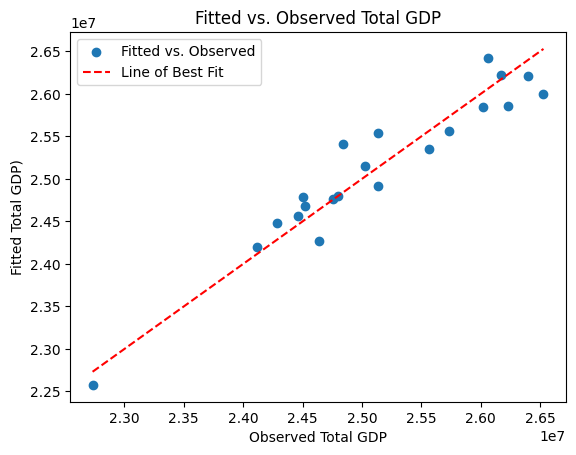

In [ ]:
X_gdp = data[['A&Food Services GDP','Retail GDP','Manufacturing GDP','Government GDP']]

Intercept = 10000000
X_gdp['Intecept'] = Intercept

Y_gdp = data['Total GDP']

model = sm.OLS(Y_gdp,X_gdp)
results = model.fit()
print(results.summary())
summarize(results)

predictions = results.predict(X_gdp)

plt.scatter(Y_gdp, predictions, label='Fitted vs. Observed')

plt.plot([min(Y_gdp), max(Y_gdp)], [min(Y_gdp), max(Y_gdp)], linestyle='--', color='red', label='Line of Best Fit')

# Labeling the plot
plt.xlabel('Observed Total GDP')
plt.ylabel('Fitted Total GDP)')
plt.title('Fitted vs. Observed Total GDP')
plt.legend()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X_gdp.columns
vif_data["VIF"] = [variance_inflation_factor(X_gdp.values, i) for i in range(X_gdp.shape[1])]

print(vif_data)


              Variable           VIF
0  A&Food Services GDP      2.993098
1           Retail GDP      1.411579
2    Manufacturing GDP      4.237906
3       Government GDP      1.860093
4             Intecept  11935.354225


A&Food Services GDP        2.993098
Retail GDP                 1.411579
Manufacturing GDP          4.237906
Government GDP             1.860093
Intecept               11935.354225
dtype: float64


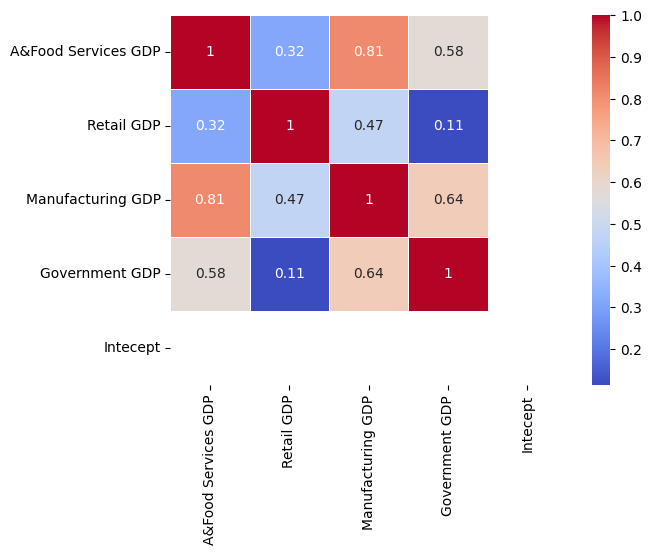

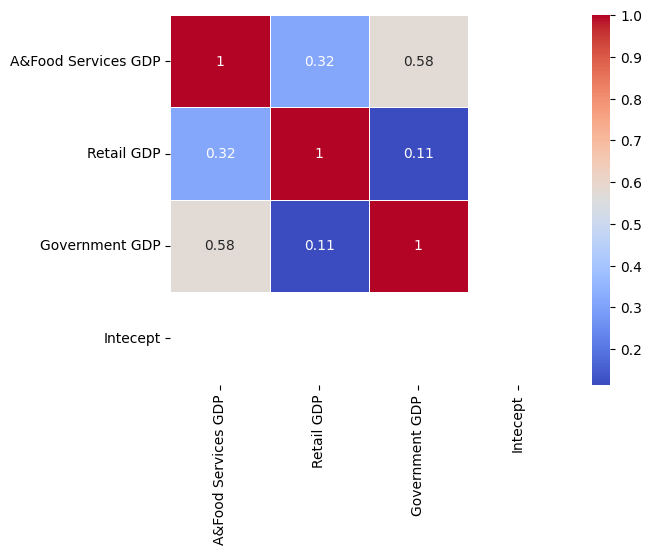

In [ ]:
import seaborn as sns

X_gdp = data[['A&Food Services GDP','Retail GDP','Manufacturing GDP','Government GDP']]

Intercept = 10000000
X_gdp['Intecept'] = Intercept
vif = [variance_inflation_factor(X_gdp.values, i) \
    for i in range(X_gdp.shape[1])]
print(pd.Series(vif, X_gdp.columns))

correlation_matrix = X_gdp.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.show()

X_gdp = X_gdp.drop(['Manufacturing GDP'], axis=1)

correlation_matrix = X_gdp.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.show()

                            OLS Regression Results                            
Dep. Variable:              Total GDP   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     49.28
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.34e-08
Time:                        21:05:42   Log-Likelihood:                -294.08
No. Observations:                  21   AIC:                             596.2
Df Residuals:                      17   BIC:                             600.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.124e+07    

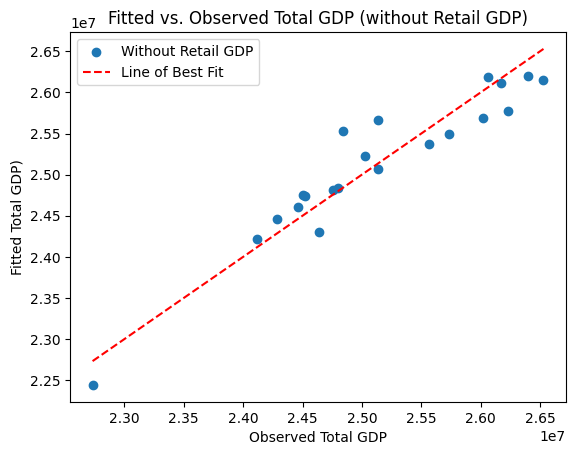

,coef,std err,t,P>|t|
const,-3.124000e+07,7000000.000,-4.460,0.000
A&Food Services GDP,-1.858100e+00,1.250,-1.486,0.156
Manufacturing GDP,6.724800e+00,1.358,4.952,0.000
Government GDP,1.284790e+01,2.639,4.868,0.000


In [ ]:
X_gdp_without_retail = data[['A&Food Services GDP', 'Manufacturing GDP', 'Government GDP']]
Y_gdp = data['Total GDP']
X_gdp_without_retail = sm.add_constant(X_gdp_without_retail)
model_without_retail = sm.OLS(Y_gdp, X_gdp_without_retail)
results_without_retail = model_without_retail.fit()
print(results_without_retail.summary())


predictions_without_retail = results_without_retail.predict(X_gdp_without_retail)

plt.scatter(Y_gdp, predictions_without_retail, label='Without Retail GDP')

plt.plot([min(Y_gdp), max(Y_gdp)], [min(Y_gdp), max(Y_gdp)], linestyle='--', color='red', label='Line of Best Fit')

# Labeling the plot
plt.xlabel('Observed Total GDP')
plt.ylabel('Fitted Total GDP)')
plt.title('Fitted vs. Observed Total GDP (without Retail GDP)')
plt.legend()
plt.show()
summarize(results_without_retail)

                            OLS Regression Results                            
Dep. Variable:              Total GDP   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     68.23
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.97e-09
Time:                        21:07:26   Log-Likelihood:                -295.37
No. Observations:                  21   AIC:                             596.7
Df Residuals:                      18   BIC:                             599.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.716e+07   6.66e+0

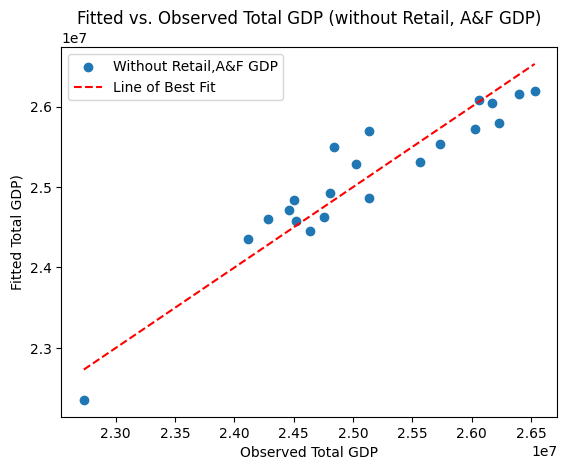

,coef,std err,t,P>|t|
const,-2.716000e+07,6660000.000,-4.080,0.001
Manufacturing GDP,5.306600e+00,0.998,5.317,0.000
Government GDP,1.234970e+01,2.704,4.566,0.000


In [ ]:
X_gdp_without_retail_food = data[['Manufacturing GDP', 'Government GDP']]
Y_gdp = data['Total GDP']
X_gdp_without_retail_food = sm.add_constant(X_gdp_without_retail_food)
model_without_retail_food = sm.OLS(Y_gdp, X_gdp_without_retail_food)
results_without_retail_food = model_without_retail_food.fit()
print(results_without_retail_food.summary())


predictions_without_retail_food = results_without_retail_food.predict(X_gdp_without_retail_food)

plt.scatter(Y_gdp, predictions_without_retail_food, label='Without Retail,A&F GDP')

plt.plot([min(Y_gdp), max(Y_gdp)], [min(Y_gdp), max(Y_gdp)], linestyle='--', color='red', label='Line of Best Fit')

# Labeling the plot
plt.xlabel('Observed Total GDP')
plt.ylabel('Fitted Total GDP)')
plt.title('Fitted vs. Observed Total GDP (without Retail, A&F GDP)')
plt.legend()
plt.show()
summarize(results_without_retail_food)